# Pendahuluan

Di dalam material ini, kamu akan mempelajari Data Heart Disease dan belajar bagaimana dilakukan elaborasi. Lakukan kode dan jalankan setiap sel. Selama proses pembelajaran, kamu akan menemui beberapa blok **TODO** -- ikuti petunjuk untuk mengisinya sebelum menjalankan sel-sel tersebut dan melanjutkan.

## Introduction to Capstone Project

Cardiovascular disease (CVDs) atau penyakit jantung merupakan penyebab kematian nomor satu secara global dengan 17,9 juta kasus kematian setiap tahunnya. Penyakit jantung disebabkan oleh hipertensi, obesitas, dan gaya hidup yang tidak sehat. Deteksi dini penyakit jantung perlu dilakukan pada kelompok risiko tinggi agar dapat segera mendapatkan penanganan dan pencegahan. Sehingga tujuan bisnis yang ingin dicapai yaitu membentuk model prediksi penyakit jantung pada pasien berdasarkan feature-feature yang ada untuk membantu para dokter melakukan diagnosa secara tepat dan akurat. Harapannya agar penyakit jantung dapat ditangani lebih awal. Dengan demikian, diharapkan juga angka kematian akibat penyakit jantung dapat turun.

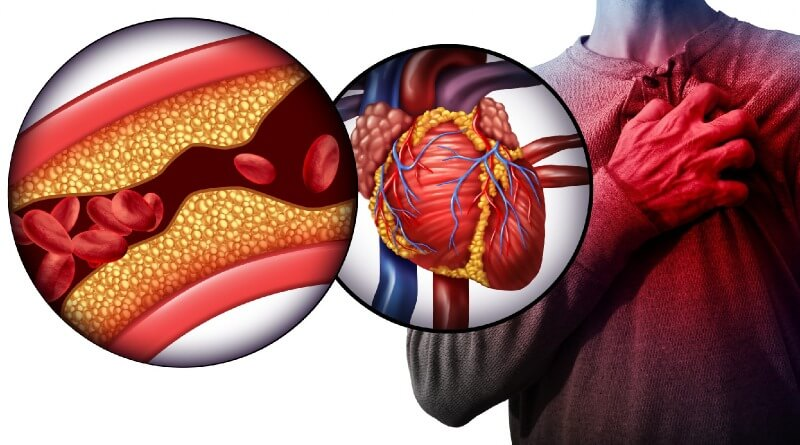

**Problem Statement**

Masalah yang ingin kita selesaikan adalah melakukan diagnosa pasien penderita penyakit jantung secara tepat dan akurat. Perlu dilakukan analisis faktor-faktor penyebab dan gejala penyakit jantung pada pasien.

**About Datasets**

Dataset yang digunakan adalah data Heart Disease yang diunduh dari UCI ML: https://archive.ics.uci.edu/dataset/45/heart+disease

Dataset yang digunakan ini berasal dari tahun 1988 dan terdiri dari empat database: Cleveland, Hungaria, Swiss, dan Long Beach V. Bidang "target" mengacu pada adanya penyakit jantung pada pasien. Ini adalah bilangan bulat bernilai 0 = tidak ada penyakit dan 1 = penyakit.

Dataset heart disease terdiri dari 1025 baris data dan 13 atribut + 1 target. Dataset ini memiliki 14 kolom yaitu:

1. age: variabel ini merepresentasikan usia pasien yang diukur dalam tahun.
2. sex: variabel ini merepresentasikan jenis kelamin pasien dengan nilai 1 untuk laki-laki dan nilai 0 untuk perempuan.
3. cp (Chest pain type): variabel ini merepresentasikan jenis nyeri dada yang dirasakan oleh pasien dengan 4 nilai kategori yang mungkin: nilai 1 mengindikasikan nyeri dada tipe angina, nilai 2 mengindikasikan nyeri dada tipe nyeri tidak stabil, nilai 3 mengindikasikan nyeri dada tipe nyeri tidak stabil yang parah, dan nilai 4 mengindikasikan nyeri dada yang tidak terkait dengan masalah jantung.
4. trestbps (Resting blood pressure): variabel ini merepresentasikan tekanan darah pasien pada saat istirahat, diukur dalam mmHg (milimeter air raksa (merkuri)).
5. chol (Serum cholestoral): variabel ini merepresentasikan kadar kolesterol serum dalam darah pasien, diukur dalam mg/dl (miligram per desiliter).
6. fbs (Fasting blood sugar): variabel ini merepresentasikan kadar gula darah pasien saat puasa (belum makan) dengan nilai 1 jika kadar gula darah > 120 mg/dl dan nilai 0 jika tidak.
7. restecg (Resting electrocardiographic results): variabel ini merepresentasikan hasil elektrokardiogram pasien saat istirahat dengan 3 nilai kategori yang mungkin: nilai 0 mengindikasikan hasil normal, nilai 1 mengindikasikan adanya kelainan gelombang ST-T, dan nilai 2 mengindikasikan hipertrofi ventrikel kiri.
8. thalach (Maximum heart rate achieved): variabel ini merepresentasikan detak jantung maksimum yang dicapai oleh pasien selama tes olahraga, diukur dalam bpm (denyut per menit).
9. exang (Exercise induced angina): variabel ini merepresentasikan apakah pasien mengalami angina (nyeri dada) yang dipicu oleh aktivitas olahraga, dengan nilai 1 jika ya dan nilai 0 jika tidak.
10. oldpeak: variabel ini merepresentasikan seberapa banyak ST segmen menurun atau depresi saat melakukan aktivitas fisik dibandingkan saat istirahat.
11. slope: variabel ini merepresentasikan kemiringan segmen ST pada elektrokardiogram (EKG) selama latihan fisik maksimal dengan 3 nilai kategori.
12. ca (Number of major vessels): variabel ini merepresentasikan jumlah pembuluh darah utama (0-3) yang terlihat pada pemeriksaan flourosopi.
13. thal: variabel ini merepresentasikan hasil tes thalium scan dengan 3 nilai kategori yang mungkin:
 - thal 1: menunjukkan kondisi normal.
 - thal 2: menunjukkan adanya defek tetap pada thalassemia.
 - thal 3: menunjukkan adanya defek yang dapat dipulihkan pada thalassemia.
14. target: 0 = tidak ada penyakit dan 1 = penyakit.

**Objective of Capstone 1**

Tujuan dari Capstone adalah melakukan data preprocessing termasuk Exploratory Data Analysis untuk menggali insight dari data pasien penderita penyakit jantung hingga proses feature selection dan dimensionality reduction. Hasil akhir yang ingin dicapai yaitu mendapatkan insight data penderita penyakit jantung dan data yang siap untuk dimodelkan pada tahap selanjutnya.

**Metrics**

Tahap untuk mendukung dalam menyelesaikan problem statement yang ada dan akan digunakan untuk memantau kinerja solusi. Berikut metrics yang termasuk :
1. Jumlah Penderita penyakit jantung
2. Proporsi pasien pria dan wanita yang mengalami penyakit jantung
3. Usia rata rata pasien yang terkena penyakit jantung
4. Korelasi penyakit jantung terhadap tiap variabel yang ada pada dataset (kolestrol, tekanan darah, jenis kelamin, kadar gula darah, detak jantung maksumun selama tes latihan, dan variabel lainnya)

**Persiapan**

Disini kita akan menyiapkan libraries yang diperlukan dan dataset berdasarkan link: https://storage.googleapis.com/dqlab-dataset/heart_disease.csv. Dalam rangka mengetahui tentang dataset, kita akan melihat overview.

In [172]:
#Import libraries
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
'''TODO: Menampilkan lima baris teratas'''
# Memuat dataset Heart Disease UCI ML
url = "https://storage.googleapis.com/dqlab-dataset/heart_disease.csv"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names, skiprows=[0])

# Menampilkan lima baris teratas
data.#TODO

In [ ]:
'''TODO: Menampilkan lima baris terbawah'''
# Menampilkan lima baris terbawah
data.#TODO

In [ ]:
'''TODO: Menampilkan jumlah baris dan kolom'''
# Melihat jumlah dataset (jumlah baris dan kolom)
data.#TODO

In [ ]:
'''TODO: Menampilkan nama kolom'''
# Melihat columns apa saja yang ada dalam dataset
data.#TODO

In [ ]:
'''TODO: Menampilkan persebaran data untuk data numerik'''
# Melihat persebaran data
data.#TODO

In [ ]:
'''TODO: Menampilkan jumlah data yang unik untuk semua kolom'''
# Melihat uniqueness data
data.#TODO

In [ ]:
'''TODO: Menampilkan informasi dalam dataframe'''
# Melihat informasi dari dataset
data.#TODO

**Data Quality**

Disini kita akan melakukan pengecekan karakter, handling missing value, outlier, duplikat dan data imbalance serta skewness.

In [ ]:
'''TODO: Memilih mana data yang kategorikal dan ubah menjadi object'''
# Melakukan handling kolom menjadi kategorikal
lst=[#TODO]
data[lst] = data[lst].astype(object)

# Melihat perubahan
data.dtypes

In [ ]:
# Pelabelan data categorical
data['sex'] = data['sex'].replace({1: 'Male',
                                   0: 'Female'})
data['cp'] = data['cp'].replace({0: 'typical angina',
                                 1: 'atypical angina',
                                 2: 'non-anginal pain',
                                 3: 'asymtomatic'})
data['fbs'] = data['fbs'].replace({0: 'No',
                                   1: 'Yes'})
data['restecg'] = data['restecg'].replace({0: 'probable or definite left ventricular hypertrophy',
                                           1:'normal',
                                           2: 'ST-T Wave abnormal'})
data['exang'] = data['exang'].replace({0: 'No',
                                       1: 'Yes'})
data['slope'] = data['slope'].replace({0: 'downsloping',
                                       1: 'flat',
                                       2: 'upsloping'})
data['thal'] = data['thal'].replace({1: 'normal',
                                     2: 'fixed defect',
                                     3: 'reversable defect'})
data['ca'] = data['ca'].replace({0: 'Number of major vessels: 0',
                                 1: 'Number of major vessels: 1',
                                 2: 'Number of major vessels: 2',
                                 3: 'Number of major vessels: 3'})
data['target'] = data['target'].replace({0: 'No disease',
                                         1: 'Disease'})

In [ ]:
'''TODO: Memisahkan data numerical dengan categorical'''
# Pisahkan numerical dan categorical 
numerical_col = data.select_dtypes(exclude=#TODO)
categorical_col = data.select_dtypes(exclude=#TODO)

In [ ]:
# Pengecekan karakter dari data kategorikal
for i in categorical_col:
    print("Berikut ini merupakan informasi: {} dengan {}".format(i, data[i].unique()))
    print()

Terdapat dua feature yang mengalami kesalahan penulisan:
1. Feature 'CA': Memiliki 5 nilai dari rentang 0-4, maka dari itu nilai 4 diubah menjadi NaN (karena seharusnya tidak ada)
2. Feature 'thal': Memiliki 4 nilai dari rentang 0-3, maka dari itu nulai 0 diubah menjadi NaN (karena seharusnya tidak ada)

In [ ]:
'''TODO: Menampilkan jumlah data per item'''
# Melihat jumlah nilai unik dari kolom 'ca'
data['ca'].#TODO

Bahwa ada data di kolom 'ca' yang bernilai '4' sebanyak 18. Padahal nilai '4' harusnya tidak ada.

In [ ]:
# Menemukan baris dengan kolom 'ca' bernilai '4'
data[data['ca']==4]

In [ ]:
'''TODO: Ubah menjadi NaN'''
# Ganti kolom 'ca' yang bernilai '4' menjadi NaN
data.loc[data['ca']==4, 'ca'] = #TODO

In [ ]:
# Cek kembali apakah masih ada data kolom 'ca' yang bernilai '4'
data['ca'].value_counts()

In [ ]:
# Melihat jumlah nilai unik dari kolom 'thal'
data['thal'].value_counts()

Bahwa ada data di kolom 'thal' yang bernilai '0' sebanyak 7. Padahal nilai '0' harusnya tidak ada.

In [ ]:
# Menemukan baris dengan kolom 'thal' bernilai '0'
data[data['thal']==0]

In [ ]:
'''TODO: Ubah menjadi NaN'''
# Ganti kolom 'thal' yang bernilai '0' menjadi NaN
data.loc[data['thal']==0, 'thal'] = #TODO

In [ ]:
# Cek kembali apakah masih ada data kolom 'thal' yang bernilai '0'
data['thal'].value_counts()

Selanjutnya kita akan handling missing value.

In [ ]:
'''TODO: Menampilkan missing value'''
# Check missing values
print("Hasil missing value:\n", data.#TODO)

In [116]:
'''TODO: Mengisi dengan modus'''
# Fillna pada kolom 'ca' dengan modus
modus_ca = data['ca'].#TODO
data['ca'] = data['ca'].fillna(#TODO)

# Fillna pada kolom 'thal' dengan modus
modus_thal = data['thal'].#TODO
data['thal'] = data['thal'].fillna(#TODO)

In [ ]:
'''TODO: Menampilkan missing value'''
# Check missing values kembali
print("Hasil missing value:\n", data.#TODO)

Kita akan melakukan pengecekan rows yang duplikat.

In [ ]:
'''TODO: Menampilkan data duplikat ada berapa'''
# Memeriksa duplikat data
data.#TODO

In [ ]:
# Menampilkan baris data duplicate
data[data.duplicated()]

Berdasarkan output diatas, kamu perlu melakukan drop duplikat data agar tidak ada data yang duplikat dalam dataset.

In [ ]:
'''TODO: Menghapus data duplikat dan mempertahankan data pertama'''
# Menghapus data duplikat
data.drop_duplicates(#TODO)

# Memeriksa ulang duplikat data
data.#TODO

Selanjutnya kita akan menampilkan outliers dan menghapus data yang outlier.

In [ ]:
'''TODO: Menampilkan boxplot seluruh data'''
#Menampilkan boxplot untuk melihat outliers data numerik
#TODO.plot(kind = 'box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

In [ ]:
'''TODO: Menampilkan boxplot chol per target'''
# Menampilkan data berdasarkan target untuk feature chol
sns.boxplot(#TODO)
plt.show()

Data yang outliers terletak pada data non-categorical atau data continuous yaitu: 'age', 'trestbps', 'chol', 'thalach', dan 'oldpeak'

In [ ]:
'''TODO: Menentukan data continous'''
#Mencari tahu data yang outliers dengan mendefinisikan fungsi
continous_features = [#TODO]  
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) 
        Q3 = np.percentile(feature_data, 75.) 
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, Num of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

'''TODO: Menampilkan data yang outlier'''
outliers(#TODO)

In [ ]:
'''TODO: Menghapus data yang outlier'''
# Menghapus outlier dengan fungsi sebelumnya
outliers(#TODO)

Melihat informasi dari kategori dari data kategorikal. 

In [ ]:
'''TODO: Buatlah histogram sex'''
# Jumlah kategori sex pada dataset
#TODO.hist().plot(kind='bar')
plt.title('Distribusi Gender')
plt.show()

In [ ]:
'''TODO: Buatlah histogram age'''
# Jumlah kategori age pada dataset
#TODO.hist().plot(kind='bar')
plt.title('Distribusi Usia Pasien')
plt.show()

In [ ]:
'''TODO: Buatlah histogram cp'''
# Jumlah kategori cp pada dataset
#TODO.hist().plot(kind='bar')
plt.title('Distribusi Cholesterol')
plt.show()

Selanjutnya kita akan melakukan pengecekan data, apakah target imbalance?

In [ ]:
'''TODO: Memeriksa data yang imbalance'''
# Memeriksa data imbalance
ax = sns.countplot(#TODO)
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

Dapat dilihat pada output diatas data cukup seimbang (balanced), karena tidak terdapat perbedaan yang signifikan dimana terdiagnosa **disease** adalah 55.8% (158 cases), dan lain halnya untuk **no disease** adalah kurang dari 45%.

**Periksa statistik deskriptif dari kumpulan data (rata-rata, distribusi, dll)**

In [ ]:
# Melihat statistik deskriptif dari data
data.describe()

Dari kumpulan data yang diberikan, dapat dilihat bahwa terdapat 302 entri dan 6 kolom. Berikut adalah statistik deskriptif dari setiap variabel:

1. age: umur pasien, dengan rata-rata (mean) 54.42 tahun dan rentang antara 29 hingga 77 tahun. 
2. trestbps: tekanan darah saat istirahat (resting blood pressure) dalam mmHg, dengan rata-rata 131.6 dan rentang antara 94 hingga 200. 
3. chol: serum kolesterol dalam mg/dl, dengan rata-rata 246.5 dan rentang antara 126 hingga 564.
4. thalach: detak jantung maksimal yang dicapai selama tes olahraga, dengan rata-rata 149.57 dan rentang antara 71 hingga 202. 
5. oldpeak: depresi ST (ST depression) relatif terhadap istirahat yang diinduksi oleh olahraga, dengan rata-rata 1.043 dan rentang antara 0 hingga 6.2. 
6. target: variabel target yang menunjukkan keberadaan atau tidaknya penyakit jantung, dengan nilai 0 menunjukkan tidak adanya penyakit dan nilai 1 menunjukkan adanya penyakit.

Selanjutnya kita melihat distribusi data countinous.

In [ ]:
# Memvisualisasikan distribusi variabel numerical
plt.figure(figsize=(16,8))
for index,column in enumerate(numerical_col):
    plt.subplot(2,3,index+1)
    sns.histplot(data=numerical_col,x=column,kde=True)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

In [ ]:
# Memvisualisasikan distribusi variabel kategorikal
plt.figure(figsize=(12,12))
for index, column in enumerate(categorical_col):
    plt.subplot(4, 3, index+1)
    sns.countplot(data=categorical_col,x=column, hue='target', palette='magma')
    plt.xlabel(column.upper(),fontsize=14)
    plt.ylabel("count", fontsize=14)

plt.tight_layout(pad = 1.0)
plt.show()

Melihat korelasi antar feature.

In [ ]:
'''TODO: Menampilkan oldpeak dengan thalach'''
# melihat korelasi tingkat depresi dan detak jantung maksimum
plt.figure(figsize = (8,6))
sns.regplot(#TODO, scatter_kws = {'color':'blue'}, line_kws = {'color':'purple'})
plt.title('Sebaran Data Pasien Berdasarkan\nTingkat Stres dan Detak Jantung Maksimum')
plt.show()

In [ ]:
'''TODO: Menampilkan oldpeak dengan trestbps'''
# melihat korelasi tingkat depresi dan tekanan darah
plt.figure(figsize = (8,6))
sns.regplot(#TODO, scatter_kws = {'color':'blue'}, line_kws = {'color':'purple'})
plt.title('Sebaran Data Pasien Berdasarkan\nTingkat Stres dan Tekanan Darah')
plt.show()

Simpulkan dari grafik yang kamu dapatkan?

In [ ]:
# Simpan data yang sudah ada label
data.to_csv('data.csv')

# Melabeli kembali datanya
df = pd.read_csv('data.csv', index_col=0)
df['sex'] = df['sex'].replace({'Male' : 1,'Female': 0})
df['cp'] = df['cp'].replace({'typical angina' : 0, 'atypical angina' : 1, 'non-anginal pain' : 2, 'asymtomatic' : 3})
df['fbs'] = df['fbs'].replace({'No' : 0, 'Yes' : 1})
df['restecg'] = df['restecg'].replace({'probable or definite left ventricular hypertrophy':0,'normal':1,'ST-T Wave abnormal':2})
df['exang'] = df['exang'].replace({'No':0,'Yes':1})
df['slope'] = df['slope'].replace({'downsloping':0, 'flat':1,'upsloping':2})
df['thal'] = df['thal'].replace({'normal':1, 'fixed defect':2,'reversable defect':3})
df['ca'] = df['ca'].replace({'Number of major vessels: 0':0, 'Number of major vessels: 1':1,'Number of major vessels: 2':2, 'Number of major vessels: 3':3})
df['target'] = df['target'].replace({'No disease':0,'Disease':1})

In [ ]:
'''TODO: Menampilkan grafik korelasi'''
# melihat korelasi antar variable untuk mencari feature yang penting
plt.figure(figsize=(20,20))
cor = #TODO
sns.heatmap(cor,annot=True, linewidth=.5, cmap="magma")
plt.title('Korelasi Antar Variable', fontsize = 30)
plt.show()

In [ ]:
'''TODO: Menampilkan tabel korelasi'''
cor_matrix = #TODO
cor_matrix

In [ ]:
#Mengurutkan korelasi
cor_matrix['target'].sort_values()

Korelasi target(penyakit jantung) dengan variabel lainnya. Korelasi positif dengan variabel tertentu berarti semakin tinggi variabel tersebut maka akan semakin tinggi juga kemungkinan terkena penyakit jantung, sedangkan korelasi negatif ialah semakin rendah nilai variabel tersebut maka kemungkinan terkena penyakit jantung lebih tinggi.

1. ca -0.456989 (Korelasi Negatif Kuat)
2. oldpeak -0.434108 (Korelasi Negatif Kuat)
3. exang -0.431599 (Korelasi Negatif Kuat)
4. thal -0.370759 (Korelasi Negatif Kuat)
5. sex -0.318896 (Korelasi Negatif Kuat)
6. age -0.222416 (Korelasi Negatif)
7. trestbps -0.115614 (Korelasi Negatif Lemah)
8. chol -0.0105627 (Korelasi Negatif Lemah)
9. fbs 0.027210 (Korelasi Positif Lemah)
10. restecg 0.171453 (Korelasi Positif Lemah)
11. slope 0.326473 (korelasi Positif Kuat)
12. cp 0.422559 (korelasi Positif Kuat)
13. thalach 0.432211 (korelasi Positif Kuat)

Jadi, bisa disimpulkan faktor yang paling berpengaruh terhadap penyakit jantung ialah, sebagai berikut:

1. ca (semakin banyak major vessels ,maka akan semakin tinggi resiko terkena penyakit jantung)
2. oldpeak (Semakin rendah depresi ST yang disebabkan oleh latihan relatif terhadap istirahat, maka resiko terkena penyakit jantung akan semakin tinggi)
3. exang (Apibila exercise induced angina rendah, maka resiko terkena penyakit jantung akan semakin tinggi)
4. thal(semakin rendah tipe jenis defek jantung, maka resiko terkena penyakit jantung semakin tinggi)
5. sex (Perempuan memiliki resiko terkena penyakit jantung lebih tinggi dibandingkan laki-laki)
6. age (semakin muda umur, ternyata semakin tinggi terkena penyakit jantung)
7. slope (Semakin tinggi kemiringan segmen latihan ST maka, resiko terkena penyakit jantung semakin tinggi)
8. cp (Semakin tinggi tipe Jenis rasa sakit pada dada, maka resiko terkena penyakit jantung semakin tinggi)
9. thalach (semakin tinggi detak jantung maksimum yang dicapai pasien selama tes latihan, maka resiko terkena penyakit jantung semakin tinggi)

Kesimpulan.

1. 'cp', 'thalach', dan 'slope' berkorelasi positif cukup kuat dengan 'target'.
2. 'oldpeak', 'exang', 'ca', 'thal', 'sex', dan 'age' berkorelasi cukup kuat dengan 'target'.
3. 'fbs', 'chol', 'trestbps', dan 'restecg' memiliki korelasi yang lemah dengan 'target'.

Feature yang dipilih yaitu :'cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', dan 'age' untuk dianalisa lebih lanjut.

In [ ]:
'''TODO: Memasukkan 9 variabel terpilih diatas'''
variabel = [#TODO]
analyze = df[variabel]

In [ ]:
# Informasi variabel ke target
fig = plt.figure(figsize=(15,9))
for index in range(len(analyze.columns)):
    plt.subplot(3,3,index + 1)
    sns.scatterplot(x = analyze.iloc[:,index],y=df.target,data = analyze)
    plt.xlabel(analyze.columns[index], fontsize=14)
    plt.ylabel("Target", fontsize=14)

fig.tight_layout(pad = 1.0)

**Scaling data**

Scaling adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.

In [ ]:
# Mendefinisikan standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop("target", axis=1))

In [ ]:
# Perform PCA for dimensionality reduction
feature_number = len(X_scaled[0])
pca = PCA(n_components=feature_number)

# Fit PCA with dataset
pca.fit(X_scaled)

# Get variance information
variance_ratio = pca.explained_variance_ratio_

# Calculate cummulative
cumulative_variance = np.cumsum(variance_ratio)

# Create Scree Plot
plt.plot(range(1, len(variance_ratio) + 1), variance_ratio, marker='o')
plt.xlabel('Komponen Utama ke-')
plt.ylabel('Varians (Nilai Eigen)')
plt.title('Scree Plot')
plt.show()

In [ ]:
pca = PCA(n_components=9)
heart_data_reduced = pca.fit_transform(X_scaled)

In [ ]:
feature_names = df.drop('target', axis=1).columns.to_list()
component_names = [f"PC{i+1}" for i in range(pca.n_components_)]

for component, component_name in zip(pca.components_, component_names):
    feature_indices = component.argsort()[::-1]
    retained_features = [feature_names[idx] for idx in feature_indices[:pca.n_components_]]
    print(f"{component_name}: {retained_features}")

Copyright © DQlab Academy x Abel Kristanto